In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
childcare = pd.read_csv("childcare_costs.csv")
childcare.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [3]:
health = pd.read_csv("healthdata.csv")
health.head()

,name,fips,state,land_area (km^2),area (km^2),longitude (deg),latitude (deg),noaa/prcp,noaa/snow,noaa/temp,...,"industry/Agriculture, forestry, fishing and hunting/payroll","industry/Agriculture, forestry, fishing and hunting/employees",industry/Utilities/payroll,industry/Utilities/employees,industry/Management of companies and enterprises/payroll,industry/Management of companies and enterprises/employees,industry/Industries not classified/payroll,industry/Industries not classified/employees,"industry/Mining, quarrying, and oil and gas extraction/payroll","industry/Mining, quarrying, and oil and gas extraction/employees"
0,cuming county,31039,NE,1477.641638,1488.343176,-96.787366,41.916346,30.5,28.2,48.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,lancaster county,31109,NE,2169.252486,2192.120047,-96.688211,40.784132,31.0,25.3,51.0,...,730000.0,111.0,8730000.0,95.0,165117000.0,2024.0,150000.0,3.0,NaN,NaN
2,nuckolls county,31129,NE,1489.645186,1491.363670,-98.047277,40.176383,27.7,22.2,51.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,keith county,31101,NE,2749.531887,2874.204062,-101.657059,41.198294,20.0,25.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,phelps county,31137,NE,1398.048570,1399.695104,-99.414593,40.513105,25.5,26.7,50.3,...,2557000.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
counties = pd.read_csv("counties.csv")
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


In [5]:
counties['county_name'] = counties['county_name'].str.lower()
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,autauga county,Alabama,AL
1,1003,baldwin county,Alabama,AL
2,1005,barbour county,Alabama,AL
3,1007,bibb county,Alabama,AL
4,1009,blount county,Alabama,AL


In [6]:
childcare_health = childcare.merge(health, left_on='county_fips_code', right_on='fips', how='inner')
print("num rows: ", childcare_health.shape[0])
print("num columns: ", childcare_health.shape[1])
data_all = childcare_health
childcare_health.head()

num rows:  34549
num columns:  298


,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,"industry/Agriculture, forestry, fishing and hunting/payroll","industry/Agriculture, forestry, fishing and hunting/employees",industry/Utilities/payroll,industry/Utilities/employees,industry/Management of companies and enterprises/payroll,industry/Management of companies and enterprises/employees,industry/Industries not classified/payroll,industry/Industries not classified/employees,"industry/Mining, quarrying, and oil and gas extraction/payroll","industry/Mining, quarrying, and oil and gas extraction/employees"
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,4979000.0,86.0,19912000.0,170.0,NaN,NaN,NaN,NaN,4512000.0,80.0
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,4979000.0,86.0,19912000.0,170.0,NaN,NaN,NaN,NaN,4512000.0,80.0
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,4979000.0,86.0,19912000.0,170.0,NaN,NaN,NaN,NaN,4512000.0,80.0
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,4979000.0,86.0,19912000.0,170.0,NaN,NaN,NaN,NaN,4512000.0,80.0
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,4979000.0,86.0,19912000.0,170.0,NaN,NaN,NaN,NaN,4512000.0,80.0


**Research Question**
1. What is the relationship between child's stage and costs of childcare in North Carolina?

In [12]:
#sns.displot(data = , x = "")
counties_nc = counties[counties['state_name'] == "North Carolina"]
county_nc_fips_code = counties_nc["county_fips_code"]
nc_childcare_health = childcare_health[childcare_health['county_fips_code'].isin(county_nc_fips_code)]
nc_childcare_health

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,"industry/Agriculture, forestry, fishing and hunting/payroll","industry/Agriculture, forestry, fishing and hunting/employees",industry/Utilities/payroll,industry/Utilities/employees,industry/Management of companies and enterprises/payroll,industry/Management of companies and enterprises/employees,industry/Industries not classified/payroll,industry/Industries not classified/employees,"industry/Mining, quarrying, and oil and gas extraction/payroll","industry/Mining, quarrying, and oil and gas extraction/employees"
20788,37001,2008,5.71,5.32,6.07,5.2,4.9,5.5,77.0,73.0,...,390000.0,13.0,9677000.0,102.0,97510000.0,756.0,49000.0,6.0,NaN,NaN
20789,37001,2009,6.60,6.12,7.05,6.1,5.7,6.5,75.8,74.7,...,390000.0,13.0,9677000.0,102.0,97510000.0,756.0,49000.0,6.0,NaN,NaN
20790,37001,2010,8.35,7.42,9.24,7.9,6.9,8.9,75.7,76.6,...,390000.0,13.0,9677000.0,102.0,97510000.0,756.0,49000.0,6.0,NaN,NaN
20791,37001,2011,8.64,7.55,9.68,8.1,6.9,9.2,75.1,75.0,...,390000.0,13.0,9677000.0,102.0,97510000.0,756.0,49000.0,6.0,NaN,NaN
20792,37001,2012,9.38,8.41,10.33,8.7,7.7,9.6,74.5,76.1,...,390000.0,13.0,9677000.0,102.0,97510000.0,756.0,49000.0,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21883,37199,2014,10.90,10.74,11.08,11.1,11.5,10.8,61.5,64.0,...,703000.0,27.0,NaN,NaN,165000.0,5.0,NaN,NaN,NaN,NaN
21884,37199,2015,11.01,10.86,11.13,11.6,12.1,11.2,61.7,64.2,...,703000.0,27.0,NaN,NaN,165000.0,5.0,NaN,NaN,NaN,NaN
21885,37199,2016,9.46,10.13,8.88,9.5,10.9,8.4,60.9,73.8,...,703000.0,27.0,NaN,NaN,165000.0,5.0,NaN,NaN,NaN,NaN
21886,37199,2017,8.34,9.68,7.18,8.8,10.7,7.1,62.9,89.6,...,703000.0,27.0,NaN,NaN,165000.0,5.0,NaN,NaN,NaN,NaN


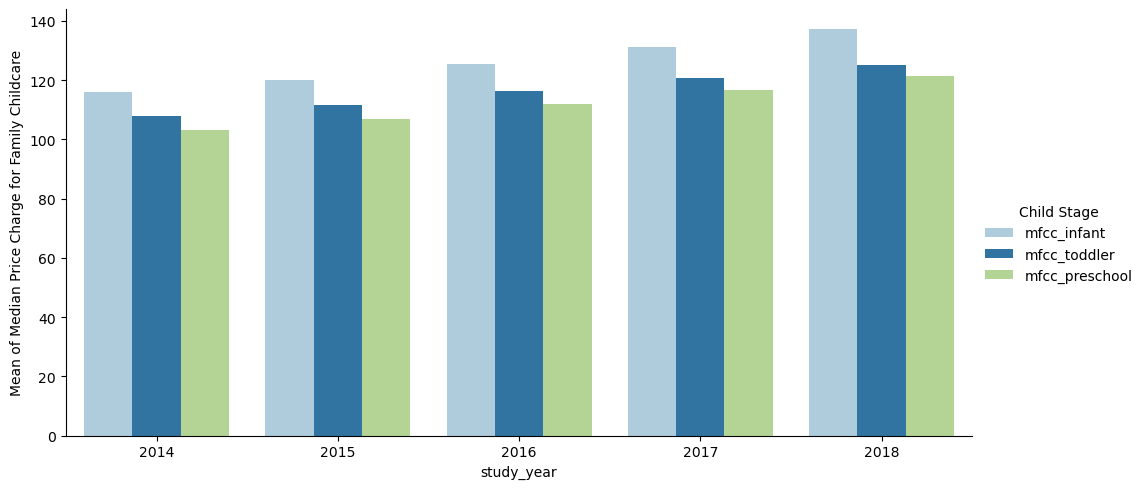

In [28]:
# In NC, aggregated median price charge for Family Childcare in the year 2014-2018
nc_year_grouped = nc_childcare_health.groupby('study_year')[['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool']].mean()
nc_year_grouped = nc_year_grouped.reset_index()
melted_data = pd.melt(nc_year_grouped, id_vars=['study_year'], value_vars=['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'], var_name='Child Stage', value_name='Mean of Median Price Charge for Family Childcare')
melted_data = melted_data[(melted_data['study_year'] >= 2014) & (melted_data['study_year'] <= 2018)]

sns.catplot(x='study_year', y = "Mean of Median Price Charge for Family Childcare", hue = "Child Stage", kind='bar', data = melted_data, palette='Paired', aspect=2)


Based on the distribution of the Family childcare spending of North Carolina in the years 2014 to 2018, we are able to make two general observations. 
1. There was a general increase in the spendings for all three child stages in the year 2014 to 2018.
2. Between the Child stages, families spend the most on childcare when the child was an infant (0-23 months), then when the child was a toddler(24-35 months), and lastly they spent the least when the child was in preschool(36-54 months). 

**Research Question**
2. What is the relationship between poverty rate/unemployment rate and costs of childcare in North Carolina?

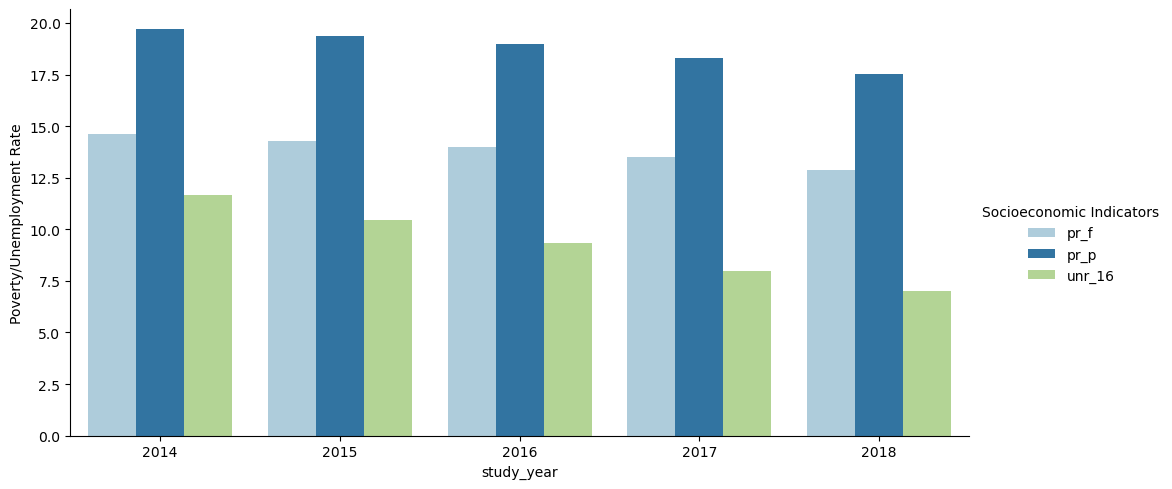

In [30]:
nc_year_grouped_ec = nc_childcare_health.groupby('study_year')[['pr_f', 'pr_p', 'unr_16']].mean()
nc_year_grouped_ec = nc_year_grouped_ec.reset_index()
melted_data_ec = pd.melt(nc_year_grouped_ec, id_vars=['study_year'], value_vars=['pr_f', 'pr_p', 'unr_16'], var_name='Socioeconomic Indicators', value_name='Poverty/Unemployment Rate')
melted_data_ec
melted_data_ec = melted_data_ec[(melted_data_ec['study_year'] >= 2014) & (melted_data_ec['study_year'] <= 2018)]

sns.catplot(x='study_year', y = "Poverty/Unemployment Rate", hue = "Socioeconomic Indicators", kind='bar', data = melted_data_ec, palette='Paired', aspect=2)

Based on the distribution of the Poverty/Unemployment Rate of North Carolina in the years 2014 to 2018, we are able to make two general observations.

1. There was a general decrease in the Poverty and the Unemployment rates in the year 2014 to 2018.
2. Between the different socioeconomic indicators, poverty rate for individuals was the highest, followed by the poverty rate for families. Lastly, the unemployment rate was the lowest. 